<a href="https://colab.research.google.com/github/SahajTC/A-Fire-Inside/blob/main/ARIMA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-11-10,15883.158203,18054.312500,15834.018555,17586.771484,17586.771484,83202283721
2022-11-11,17583.251953,17650.943359,16543.482422,17034.292969,17034.292969,55871616488
2022-11-12,17036.875000,17066.675781,16651.775391,16799.185547,16799.185547,29717699419


In [4]:
import numpy as np,matplotlib.pyplot as plt,pandas as pd
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

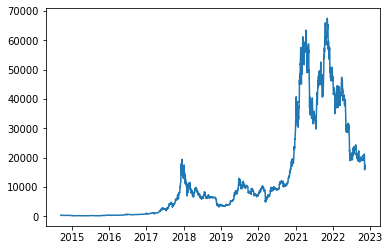

In [5]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [6]:
to_row=int(len(df)*0.9)
training_data=list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

In [10]:
model_predictions = []
n_test_obser=len(testing_data)

In [17]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit= model.fit()
  output = model_fit.forecast()
  y_pred=list(output[0])[0]
  model_predictions.append(y_pred)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


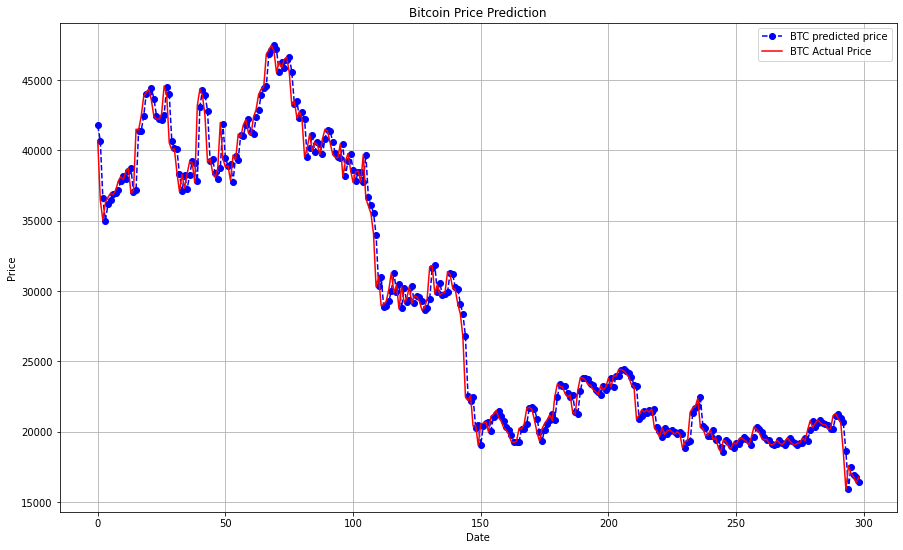

In [21]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range=df[to_row:].index
plt.plot( model_predictions, color="blue",marker="o",linestyle="dashed",label="BTC predicted price")
plt.plot(testing_data,color="red",label="BTC Actual Price")

plt.title("Bitcoin Price Prediction")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [25]:
mape=np.mean(np.abs(np.array(model_predictions[:])-np.array(testing_data))/np.abs(testing_data))
print(str(mape))

0.02508824884561477
